# Introduction to Pandas

pandas will be a major tool of interest throughout much of the rest of the book. It contains data structures and data manipulation tools designed to make data cleaning and analysis fast and convenient in Python. pandas is often used in tandem with numerical computing tools like NumPy and SciPy, analytical libraries like statsmodels and scikit-learn, and data visualization libraries like matplotlib. pandas adopts significant parts of NumPy's idiomatic style of array-based computing, especially array-based functions and a preference for data processing without for loops.

While pandas adopts many coding idioms from NumPy, the biggest difference is that pandas is designed for working with tabular or heterogeneous data. NumPy, by contrast, is best suited for working with homogeneously typed numerical array data.

Since becoming an open source project in 2010, pandas has matured into a quite large library that's applicable in a broad set of real-world use cases. The developer community has grown to over 2,500 distinct contributors, who've been helping build the project as they used it to solve their day-to-day data problems. The vibrant pandas developer and user communities have been a key part of its success.

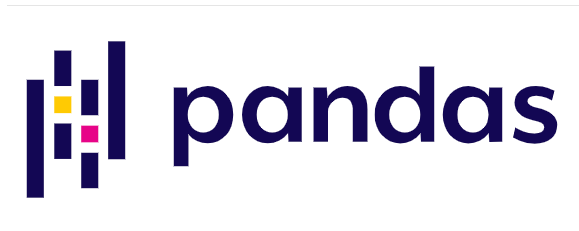

In [ ]:
import numpy as np
import pandas as pd

Thus, whenever you see pd. in code, it’s referring to pandas. You may also find it easier to import Series and DataFrame into the local namespace since they are so frequently used:

In [ ]:
from pandas import Series, DataFrame

In [ ]:
import numpy as np
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20
pd.options.display.max_colwidth = 80
np.set_printoptions(precision=4, suppress=True)

#  5.1 Introduction to pandas Data Structures
To get started with pandas, you will need to get comfortable with its two workhorse data structures: Series and DataFrame. While they are not a universal solution for every problem, they provide a solid foundation for a wide variety of data tasks.
## Series
A Series is a one-dimensional array-like object containing a sequence of values (of similar types to NumPy types) of the same type and an associated array of data labels, called its index. The simplest Series is formed from only an array of data:

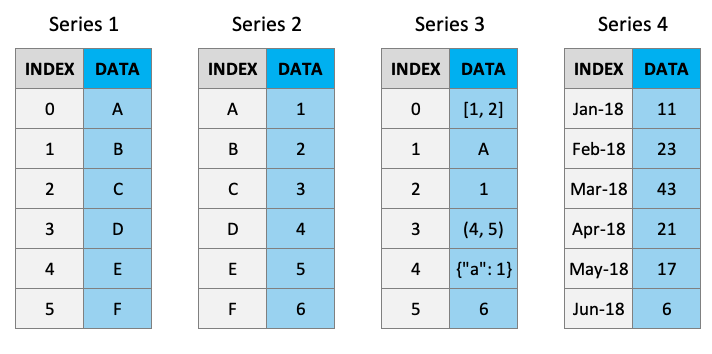

In [ ]:
obj = pd.Series([4, 7, -5, 3])
obj

The string representation of a Series displayed interactively shows the index on the left and the values on the right. Since we did not specify an index for the data, a default one consisting of the integers 0 through N - 1 (where N is the length of the data) is created. You can get the array representation and index object of the Series via its array and index attributes, respectively:

In [ ]:
obj.array
obj.index

The result of the .array attribute is a PandasArray which usually wraps a NumPy array but can also contain special extension array types which will be discussed more in Ch 7.3: Extension Data Types.

Often, you'll want to create a Series with an index identifying each data point with a label:

In [ ]:
obj2 = pd.Series([4, 7, -5, 3], index=["d", "b", "a", "c"])
obj2
obj2.index

Compared with NumPy arrays, you can use labels in the index when selecting single values or a set of values:

In [ ]:
obj2["a"]
obj2["d"] = 6
obj2[["c", "a", "d"]]

Here ["c", "a", "d"] is interpreted as a list of indices, even though it contains strings instead of integers.

Using NumPy functions or NumPy-like operations, such as filtering with a Boolean array, scalar multiplication, or applying math functions, will preserve the index-value link:

In [ ]:
obj2[obj2 > 0]
obj2 * 2
import numpy as np
np.exp(obj2)

Another way to think about a Series is as a fixed-length, ordered dictionary, as it is a mapping of index values to data values. It can be used in many contexts where you might use a dictionary:

In [ ]:
"b" in obj2
"e" in obj2

Should you have data contained in a Python dictionary, you can create a Series from it by passing the dictionary:

In [ ]:
sdata = {"Ohio": 35000, "Texas": 71000, "Oregon": 16000, "Utah": 5000}
obj3 = pd.Series(sdata)
obj3

Should you have data contained in a Python dictionary, you can create a Series from it by passing the dictionary:

In [ ]:
obj3.to_dict()

When you are only passing a dictionary, the index in the resulting Series will respect the order of the keys according to the dictionary's keys method, which depends on the key insertion order. You can override this by passing an index with the dictionary keys in the order you want them to appear in the resulting Series:

In [ ]:
states = ["California", "Ohio", "Oregon", "Texas"]
obj4 = pd.Series(sdata, index=states)
obj4

Here, three values found in sdata were placed in the appropriate locations, but since no value for "California" was found, it appears as NaN (Not a Number), which is considered in pandas to mark missing or NA values. Since "Utah" was not included in states, it is excluded from the resulting object.

I will use the terms “missing,” “NA,” or “null” interchangeably to refer to missing data. The isna and notna functions in pandas should be used to detect missing data:

In [ ]:
pd.isna(obj4)
pd.notna(obj4)

Series also has these as instance methods:



In [ ]:
obj4.isna()

I discuss working with missing data in more detail in Ch 7: Data Cleaning and Preparation.

A useful Series feature for many applications is that it automatically aligns by index label in arithmetic operations:

In [ ]:
obj3
obj4
obj3 + obj4

Data alignment features will be addressed in more detail later. If you have experience with databases, you can think about this as being similar to a join operation.

Both the Series object itself and its index have a name attribute, which integrates with other areas of pandas functionality:

In [ ]:
obj4.name = "population"
obj4.index.name = "state"
obj4

A Series’s index can be altered in place by assignment:

In [ ]:
obj
obj.index = ["Bob", "Steve", "Jeff", "Ryan"]
obj

# DataFrame
A DataFrame represents a rectangular table of data and contains an ordered, named collection of columns, each of which can be a different value type (numeric, string, Boolean, etc.). The DataFrame has both a row and column index; it can be thought of as a dictionary of Series all sharing the same index.

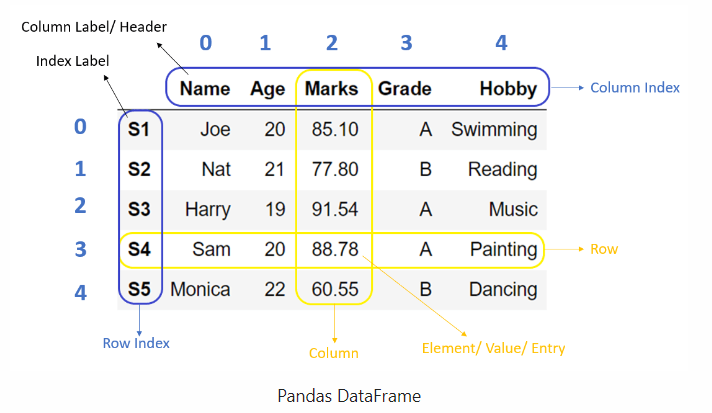

### Note
While a DataFrame is physically two-dimensional, you can use it to represent higher dimensional data in a tabular format using hierarchical indexing, a subject we will discuss in Ch 8: Data Wrangling: Join, Combine, and Reshape and an ingredient in some of the more advanced data-handling features in pandas.

There are many ways to construct a DataFrame, though one of the most common is from a dictionary of equal-length lists or NumPy arrays:

In [ ]:
import numpy as np
import pandas as pd

data = {"state": ["Ohio", "Ohio", "Ohio", "Nevada", "Nevada", "Nevada"],
        "year": [2000, 2001, 2002, 2001, 2002, 2003],
        "pop": [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)

The resulting DataFrame will have its index assigned automatically, as with Series, and the columns are placed according to the order of the keys in data (which depends on their insertion order in the dictionary):



In [ ]:
frame

# ![title](image1.jpg)

For large DataFrames, the head method selects only the first five rows:

In [ ]:
frame.head(3)

Similarly, tail returns the last five rows:



In [ ]:
frame.tail()

If you specify a sequence of columns, the DataFrame’s columns will be arranged in that order:



In [ ]:
pd.DataFrame(data, columns=["year", "state", "pop"])

If you pass a column that isn’t contained in the dictionary, it will appear with missing values in the result:

In [ ]:
frame2 = pd.DataFrame(data, columns=["year", "state", "pop", "debt"])
frame2


In [ ]:
frame2.columns

A column in a DataFrame can be retrieved as a Series either by dictionary-like notation or by using the dot attribute notation:

In [ ]:
frame2["state"]


In [ ]:
frame2.year


### Note
Attribute-like access (e.g., frame2.year) and tab completion of column names in IPython are provided as a convenience.


frame2[column] works for any column name, but frame2.column works only when the column name is a valid Python variable name and does not conflict with any of the method names in DataFrame. For example, if a column's name contains whitespace or symbols other than underscores, it cannot be accessed with the dot attribute method.

Note that the returned Series have the same index as the DataFrame, and their name attribute has been appropriately set.

Rows can also be retrieved by position or name with the special iloc and loc attributes (more on this later in Selection on DataFrame with loc and iloc):

In [ ]:
frame2

In [ ]:
frame2.loc[1]


In [ ]:
frame2.iloc[2]

Columns can be modified by assignment. For example, the empty debt column could be assigned a scalar value or an array of values:

In [ ]:
frame2["debt"] = 16.5
frame2


In [ ]:
frame2["debt"] = np.arange(6.)
frame2

When you are assigning lists or arrays to a column, the value’s **length must match** the length of the DataFrame. If you assign a Series, its labels will be realigned exactly to the DataFrame’s index, inserting missing values in any index values not present:

In [ ]:
val = pd.Series([-1.2, -1.5, -1.7], index=[2,4, "five"])
frame2["debt"] = val
frame2

Assigning a column that doesn’t exist will create a new column.

The del keyword will delete columns like with a dictionary. As an example, I first add a new column of Boolean values where the state column equals "Ohio":

In [ ]:
frame2["eastern"] = frame2["state"] == "Ohio"
frame2

### Caution
New columns cannot be created with the frame2.eastern dot attribute notation.

The del method can then be used to remove this column:



In [ ]:
print(frame2.columns)
del frame2["eastern"]
frame2.columns

### Caution
The column returned from indexing a DataFrame is a view on the underlying data, not a copy. Thus, any in-place modifications to the Series will be reflected in the DataFrame. The column can be explicitly copied with the Series’s copy method.

Another common form of data is a nested dictionary of dictionaries:



In [ ]:
populations = {"Ohio": {2000: 1.5, 2001: 1.7, 2002: 3.6},
               "Nevada": {2001: 2.4, 2002: 2.9}}

If the nested dictionary is passed to the DataFrame, pandas will interpret the outer dictionary keys as the columns, and the inner keys as the row indices:

In [ ]:
frame3 = pd.DataFrame(populations)
frame3

You can transpose the DataFrame (swap rows and columns) with similar syntax to a NumPy array:



In [ ]:
frame3.T


### Warning
Note that transposing discards the column data types if the columns do not all have the same data type, so transposing and then transposing back may lose the previous type information. The columns become arrays of pure Python objects in this case.



The keys in the inner dictionaries are combined to form the index in the result. This isn’t true if an explicit index is specified:

In [ ]:
pd.DataFrame(populations, index=[2001, 2002, 2003])

In [ ]:
frame3

Dictionaries of Series are treated in much the same way:



In [ ]:
pdata = {"Ohio": frame3["Ohio"][:-1],
         "Nevada": frame3["Nevada"][:2]}
pd.DataFrame(pdata)

For a list of many of the things you can pass to the DataFrame constructor, see Table 5.1.



# ![title](image2.jpg)

If a DataFrame’s index and columns have their name attributes set, these will also be displayed:



In [ ]:
frame3.index.name = "year"
frame3.columns.name = "state"
frame3

Unlike Series, DataFrame does not have a name attribute. DataFrame's to_numpy method returns the data contained in the DataFrame as a two-dimensional ndarray:

In [ ]:
frame3.to_numpy().dtype

If the DataFrame’s columns are different data types, the data type of the returned array will be chosen to accommodate all of the columns:

In [ ]:
frame2

In [ ]:
frame2.to_numpy()

## Index Objects
pandas’s Index objects are responsible for holding the axis labels (including a DataFrame's column names) and other metadata (like the axis name or names). Any array or other sequence of labels you use when constructing a Series or DataFrame is internally converted to an Index:

In [ ]:
obj = pd.Series(np.arange(3), index=["a", "b", "c"])

obj

In [ ]:
index = obj.index
index

In [ ]:
index[1:]

Index objects are immutable and thus can’t be modified by the user:



In [ ]:
index[1] = "d"  # TypeError

Immutability makes it safer to share Index objects among data structures:



In [ ]:
labels = pd.Index(np.arange(3)[::-1])
labels


In [ ]:
obj2 = pd.Series([1.5, -2.5, 0], index=labels)
obj2

In [ ]:
obj2.index is labels


### Caution
Some users will not often take advantage of the capabilities provided by an Index, but because some operations will yield results containing indexed data, it's important to understand how they work.

In addition to being array-like, an Index also behaves like a fixed-size set:

In [ ]:
frame3
frame3.columns


In [ ]:
"Ohio" in frame3.columns

In [ ]:
frame3

In [ ]:
2003 in frame3.index

Unlike Python sets, a pandas Index can contain duplicate labels:



In [ ]:
pd.Index(["foo", "foo", "bar", "bar"])

Selections with duplicate labels will select all occurrences of that label.

Each Index has a number of methods and properties for set logic, which answer other common questions about the data it contains. Some useful ones are summarized in Table 5.2.

# ![title](image3.jpg)

# 5.2 Essential Functionality
This section will walk you through the fundamental mechanics of interacting with the data contained in a Series or DataFrame. In the chapters to come, we will delve more deeply into data analysis and manipulation topics using pandas. This book is not intended to serve as exhaustive documentation for the pandas library; instead, we'll focus on familiarizing you with heavily used features, leaving the less common (i.e., more esoteric) things for you to learn more about by reading the online pandas documentation.

### Reindexing
An important method on pandas objects is reindex, which means to create a new object with the values rearranged to align with the new index. Consider an example:

In [ ]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=["d", "b", "a", "c"])
obj

Calling <mark>reindex</mark> on this Series rearranges the data according to the new index,
 introducing missing values if any index values were not already present:

In [ ]:
obj2 = obj.reindex(["a", "b", "c", "d", "e"])
obj2

For ordered data like time series, you may want to do some interpolation or filling of values when reindexing. The <mark>method</mark> option allows us to do this, using a method such as <mark>ffill</mark>, which forward-fills the values:

In [ ]:
obj3 = pd.Series(["blue", "purple", "yellow"], index=[0, 2, 4])
obj3


In [ ]:
obj3.reindex(np.arange(6), method="ffill")

With DataFrame, reindex can alter the (row) index, columns, or both. When passed only a sequence, it reindexes the rows in the result:

In [ ]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                     index=["a", "c", "d"],
                     columns=["Ohio", "Texas", "California"])
frame

In [ ]:
frame2 = frame.reindex(index=["a", "b", "c", "d"])
frame2

The columns can be reindexed with the columns keyword:

In [ ]:
states = ["Texas", "Utah", "California"]
frame.reindex(columns=states)

Because <mark>"Ohio"</mark> was not in <mark>states</mark>, the data for that column is dropped from the result.

Another way to reindex a particular axis is to pass the new axis labels as a positional argument and then specify the axis to reindex with the <mark>axis</mark> keyword:

In [ ]:
frame.reindex(states, axis="columns")

See Table 5.3 for more about the arguments to <mark>reindex</mark>.

# ![title](image4.jpg)

As we'll explore later in Selection on DataFrame with loc and iloc, you can also reindex by using the loc operator, and many users prefer to always do it this way. This works only if all of the new index labels already exist in the DataFrame (whereas <mark>reindex</mark> will insert missing data for new labels):

In [ ]:
frame

In [ ]:
frame.loc[["a", "d", "c"], ["California", "Texas"]]

## Dropping Entries from an Axis
Dropping one or more entries from an axis is simple if you already have an index array or list without those entries, since you can use the reindex method or .loc-based indexing. As that can require a bit of munging and set logic, the drop method will return a new object with the indicated value or values deleted from an axis:

In [ ]:
obj = pd.Series(np.arange(5.), index=["a", "b", "c", "d", "e"])
obj


In [ ]:
new_obj = obj.drop("c")
new_obj


In [ ]:
obj.drop(["d", "c"])

With DataFrame, index values can be deleted from either axis. To illustrate this, we first create an example DataFrame:



In [ ]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=["Ohio", "Colorado", "Utah", "New York"],
                    columns=["one", "two", "three", "four"])
data

Calling <mark>drop</mark> with a sequence of labels will drop values from the row labels (axis 0):



In [ ]:
data.drop(index=["Colorado", "Ohio"])

In [ ]:
data.drop("Utah")

To drop labels from the columns, instead use the <mark>columns</mark> keyword:



In [ ]:
data.drop(columns=["two"])

You can also drop values from the columns by passing <mark>axis=1</mark> (which is like NumPy) or <mark>axis="columns"</mark>:

In [ ]:
data.drop("two", axis=1)


In [ ]:
data.drop(["two", "four"], axis="columns")

## Indexing, Selection, and Filtering
Series indexing (obj[...]) works analogously to NumPy array indexing, except you can use the Series’s index values instead of only integers. Here are some examples of this:

In [ ]:
obj = pd.Series(np.arange(4.), index=["a", "b", "c", "d"])
obj

In [ ]:
obj["b"]


In [ ]:
obj[1]


In [ ]:
obj[2:4]


In [ ]:
obj[["b", "a", "d"]]


In [ ]:
obj[[1, 3]]


In [ ]:
obj[obj < 2]

While you can select data by label this way, the preferred way to select index values is with the special <mark>loc</mark> operator:

In [ ]:
obj.loc[["b", "a", "d"]]

Indexing into a **DataFrame** retrieves one or more columns either with a single value or sequence:

In [ ]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=["Ohio", "Colorado", "Utah", "New York"],
                    columns=["one", "two", "three", "four"])
data

In [ ]:
data["two"]

In [ ]:
data[["three", "one"]]

In [ ]:
data[:2]


Indexing like this has a few special cases. The first is slicing or selecting data with a Boolean array:



In [ ]:
data[data["three"] > 5]

The row selection syntax <mark>data[:2]</mark> is provided as a convenience. Passing a single element or a list to the <mark>[]</mark> operator selects columns.

Another use case is indexing with a Boolean DataFrame, such as one produced by a scalar comparison. Consider a DataFrame with all Boolean values produced by comparing with a scalar value:

In [ ]:
data < 5

We can use this DataFrame to assign the value 0 to each location with the value True, like so:



In [ ]:
data[data < 5] = 0
data

In [ ]:
data[data[data.two >5 ] >= 8] = 8
data

There are many ways to select and rearrange the data contained in a pandas object. For DataFrame, Table 5.4 provides a short summary of many of them. As you will see later, there are a number of additional options for working with hierarchical indexes.

# ![title](image5.jpg)

### Integer indexing pitfalls
Working with pandas objects indexed by integers can be a stumbling block for new users since they work differently from built-in Python data structures like lists and tuples. For example, you might not expect the following code to generate an error:

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
ser = pd.Series(np.arange(3.))
ser


In [ ]:
ser[2]

In this case, pandas could “fall back” on integer indexing, but it is difficult to do this in general without introducing subtle bugs into the user code. Here we have an index containing 0, 1, and 2, but pandas does not want to guess what the user wants (label-based indexing or position-based):

In [ ]:
ser

On the other hand, with a noninteger index, there is no such ambiguity:



In [ ]:
ser2 = pd.Series(np.arange(3.), index=["a", "b", "c"])
ser2

In [ ]:
ser2[-1]

If you have an axis index containing integers, data selection will always be label oriented. As I said above, if you use loc (for labels) or iloc (for integers) you will get exactly what you want:

In [ ]:
ser

In [ ]:
ser.iloc[-1]

On the other hand, slicing with integers is always integer oriented:



In [ ]:
ser[:-1]

As a result of these pitfalls, it is best to always prefer indexing with loc and iloc to avoid ambiguity.


### Arithmetic and Data Alignment
pandas can make it much simpler to work with objects that have different indexes. For example, when you add objects, if any index pairs are not the same, the respective index in the result will be the union of the index pairs. Let’s look at an example:

In [ ]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=["a", "c", "d", "e"])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1],
               index=["a", "c", "e", "f", "g"])
s1

In [ ]:
s2

Adding these yields:



In [ ]:
s1 + s2

The internal data alignment introduces missing values in the label locations that don’t overlap. Missing values will then propagate in further arithmetic computations.

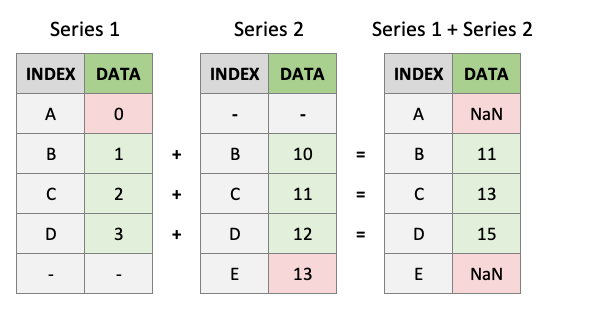

In the case of DataFrame, alignment is performed on both rows and columns:

In [ ]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list("bcd"),
                   index=["Ohio", "Texas", "Colorado"])
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list("bde"),
                   index=["Utah", "Ohio", "Texas", "Oregon"])
df1


In [ ]:
df2

Adding these returns a DataFrame with **index and columns that are the unions** of the ones in each DataFrame:

In [ ]:
df1 + df2

Since the <mark>"c"</mark> and <mark>"e"</mark> columns are not found in both DataFrame objects, they appear as missing in the result. The same holds for the rows with labels that are not common to both objects.

If you add DataFrame objects with no column or row labels in common, the result will contain all nulls:

In [ ]:
df1 = pd.DataFrame({"A": [1, 2]})
df2 = pd.DataFrame({"B": [3, 4]})
df1

In [ ]:
df2

In [ ]:
df1 + df2

### Arithmetic methods with fill values
In arithmetic operations between differently indexed objects, you might want to fill with a special value, like 0, when an axis label is found in one object but not the other. Here is an example where we set a particular value to NA (null) by assigning <mark>np.nan</mark> to it:

In [ ]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)),
                   columns=list("abcd"))
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)),
                   columns=list("abcde"))
df1

In [ ]:
df2

In [ ]:
df2.loc[1, "b"] = np.nan
df2

Adding these results in missing values in the locations that don’t overlap:



In [ ]:
df1 + df2

Using the <mark>add</mark> method on <mark>df1</mark>, I pass <mark>df2</mark> and an argument to <mark>fill_value</mark>, which substitutes the passed value for any missing values in the operation:

In [ ]:
df1.add(df2, fill_value=0)

See Table 5.5 for a listing of Series and DataFrame methods for arithmetic. Each has a counterpart, starting with the letter <mark>r</mark>, that has arguments reversed. So these two statements are equivalent:

Relatedly, when reindexing a Series or DataFrame, you can also specify a different fill value:

# ![title](image6.jpg)

## Operations between DataFrame and Series
As with NumPy arrays of different dimensions, arithmetic between DataFrame and Series is also defined. First, as a motivating example, consider the difference between a two-dimensional array and one of its rows:



In [ ]:
arr = np.arange(12.).reshape((3, 4))
arr


In [ ]:
arr[0]


In [ ]:
arr - arr[0]

When we subtract <mark>arr[0]</mark> from <mark>arr</mark>, the subtraction is performed once **for each row**. This is referred to as **broadcasting** 

In [ ]:
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),
                     columns=list("bde"),
                     index=["Utah", "Ohio", "Texas", "Oregon"])
frame

In [ ]:
series = frame.iloc[0]
series

By default, arithmetic between DataFrame and Series matches the index of the Series on the columns of the DataFrame, **broadcasting** down the rows:

In [ ]:
frame - series

If an index value is not found in either the DataFrame’s columns or the Series’s index, the objects will be reindexed to form the union:

In [ ]:
series2 = pd.Series(np.arange(3), index=["b", "e", "f"])
series2


In [ ]:
frame

In [ ]:
frame + series2

If you want to instead broadcast over the columns, matching on the rows, you have to use one of the arithmetic methods and specify to match over the index. For example:

In [ ]:
series3 = frame["d"]
series3

In [ ]:
frame

In [ ]:
frame - series3

In [ ]:
frame.sub(series3, axis="index")

The axis that you pass is the axis to match on. In this case we mean to match on the DataFrame’s row index (<mark>axis="index"</mark>) and broadcast across the columns.

## Function Application and Mapping <br>
NumPy ufuncs (element-wise array methods) also work with pandas objects:

In [ ]:
frame = pd.DataFrame(np.random.standard_normal((4, 3)),
                     columns=list("bde"),
                     index=["Utah", "Ohio", "Texas", "Oregon"])
frame

In [ ]:
np.abs(frame)

Another frequent operation is applying a function on one-dimensional arrays to each column or row. DataFrame’s <mark>apply</mark> method does exactly this:

In [ ]:
frame

In [ ]:
def f1(x):
    return x.max() - x.min()

frame.apply(f1)

Here the function <mark>f</mark>, which computes the difference between the maximum and minimum of a Series, is invoked once on each column in <mark>frame</mark>. The result is a Series having the columns of <mark>frame</mark> as its index.

If you pass <mark>axis="columns"</mark> to <mark>apply</mark>, the function will be invoked once per row instead. A helpful way to think about this is as "apply across the columns":

In [ ]:
frame.apply(f1, axis="columns")

Many of the most common array statistics (like <mark>sum</mark> and <mark>mean</mark>) are DataFrame methods, so using apply is not necessary.

The function passed to apply need not return a scalar value; it can also return a Series with multiple values:

In [ ]:
def f2(x):
    return pd.Series([x.min(), x.max()], index=["min", "max"])
frame.apply(f2)

Element-wise Python functions can be used, too. Suppose you wanted to compute a formatted string from each floating-point value in frame. You can do this with applymap:

In [ ]:
frame

In [ ]:
def my_format(x):
    return f"{x:.2f}"

frame.applymap(my_format)

The reason for the name <mark>applymap</mark> is that Series has a map method for applying an element-wise function:

In [ ]:
frame["e"].map(my_format)

## Sorting and Ranking
Sorting a dataset by some criterion is another important built-in operation. To sort lexicographically by row or column label, use the <mark>sort_index</mark> method, which returns a new, sorted object:

In [ ]:
obj = pd.Series(np.arange(4), index=["d", "a", "b", "c"])
obj

In [ ]:
obj.sort_index()

With a DataFrame, you can sort by index on either axis:



In [ ]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
                     index=["three", "one"],
                     columns=["d", "a", "b", "c"])
frame


In [ ]:
frame.sort_index()


In [ ]:
frame.sort_index(axis="columns")

With a DataFrame, you can sort by index on either axis:



In [ ]:
frame.sort_index(axis="columns", ascending=False)

To sort a Series by its values, use its sort_values method:



In [ ]:
obj = pd.Series([4, 7, -3, 2])
obj.sort_values()

Any missing values are sorted to the end of the Series by default:



In [ ]:
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])
obj.sort_values()

Missing values can be sorted to the start instead by using the <mark>na_position</mark> option:



In [ ]:
obj.sort_values(na_position="first")

When sorting a DataFrame, you can use the data in one or more columns as the sort keys. To do so, pass one or more column names to <mark>sort_values</mark>:

In [ ]:
frame = pd.DataFrame({"b": [4, 7, -3, 2], "a": [0, 1, 0, 1]})
frame

In [ ]:
frame.sort_values("b")

To sort by multiple columns, pass a list of names:



In [ ]:
frame.sort_values(["a", "b"])

Ranking assigns ranks from one through the number of valid data points in an array, starting from the lowest value. The <mark>rank</mark> methods for Series and DataFrame are the place to look; by default, <mark>rank</mark> breaks ties by assigning each group the mean rank:

In [ ]:
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])
obj.rank()

Ranks can also be assigned according to the order in which they’re observed in the data:



In [ ]:
obj.rank(method="first")

Here, instead of using the average rank 6.5 for the entries 0 and 2, they instead have been set to 6 and 7 because label 0 precedes label 2 in the data.<br>

You can rank in descending order, too:

In [ ]:
obj.rank(ascending=False)

See <mark>Table 5.6</mark> for a list of tie-breaking methods available.<br>

DataFrame can compute ranks over the rows or the columns:

In [ ]:
frame = pd.DataFrame({"b": [4.3, 7, -3, 2], "a": [0, 1, 0, 1],
                      "c": [-2, 5, 8, -2.5]})
frame

In [ ]:
frame.rank(axis="columns")

# ![title](image7.jpg)

## Axis Indexes with Duplicate Labels
Up until now almost all of the examples we have looked at have unique axis labels (index values). While many pandas functions (like <mark>reindex</mark>) require that the labels be unique, it’s not mandatory. Let’s consider a small Series with duplicate indices:

In [ ]:
obj = pd.Series(np.arange(5), index=["a", "a", "b", "b", "c"])
obj

The <mark>is_unique</mark> property of the index can tell you whether or not its labels are unique:



In [ ]:
obj.index.is_unique

Data selection is one of the main things that behaves differently with duplicates. Indexing a label with multiple entries returns a Series, while single entries return a scalar value:

In [ ]:
obj["a"]


In [ ]:
obj["c"]

This can make your code more complicated, as the output type from indexing can vary based on whether or not a label is repeated.<br>

The same logic extends to indexing rows (or columns) in a DataFrame:

In [ ]:
df = pd.DataFrame(np.random.standard_normal((5, 3)),
                  index=["a", "a", "b", "b", "c"])
df


In [ ]:
df.loc["b"]

In [ ]:
df.loc["c"]

## 5.3 Summarizing and Computing Descriptive Statistics
pandas objects are equipped with a set of common mathematical and statistical methods. Most of these fall into the category of reductions or summary statistics, methods that extract a single value (like the sum or mean) from a Series, or a Series of values from the rows or columns of a DataFrame. Compared with the similar methods found on NumPy arrays, they have built-in handling for missing data. Consider a small DataFrame:

In [ ]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                  index=["a", "b", "c", "d"],
                  columns=["one", "two"])
df

Calling DataFrame’s <mark>sum</mark> method returns a Series containing column sums:

In [ ]:
df.sum()

Passing <mark>axis="columns"</mark> or <mark>axis=1</mark> sums across the columns instead:



In [ ]:
df.sum(axis="columns")

When an entire row or column contains all NA values, the sum is 0, whereas if any value is not NA, then the result is NA. This can be disabled with the <mark>skipna</mark> option, in which case any NA value in a row or column names the corresponding result NA:

In [ ]:
df.sum(axis="index", skipna=False)

In [ ]:
df.sum(axis="columns", skipna=False)

Some aggregations, like <mark>mean</mark>, require at least one non-NA value to yield a value result, so here we have:

In [ ]:
df.mean(axis="columns")

#### See Table 5.7 for a list of common options for each reduction method.

# ![title](image8.jpg)

Some methods, like <mark>idxmin</mark> and <mark>idxmax</mark>, return indirect statistics, like the index value where the minimum or maximum values are attained:

In [ ]:
df

In [ ]:
df.idxmax()

Other methods are accumulations:



In [ ]:
df.cumsum()

Some methods are neither reductions nor accumulations. <mark>describe</mark> is one such example, producing multiple summary statistics in one shot:

In [ ]:
df

In [ ]:
df.describe()

On nonnumeric data, describe produces alternative summary statistics:



In [ ]:
obj = pd.Series(["a", "a", "b", "c"] * 4)
obj

In [ ]:
obj.describe()

### See Table 5.8 for a full list of summary statistics and related methods.

# ![title](image9.jpg)

## Correlation and Covariance
Some summary statistics, like correlation and covariance, are computed from pairs of arguments. Let’s consider some DataFrames of stock prices and volumes originally obtained from Yahoo! Finance and available in binary Python pickle files you can find in the accompanying datasets for the book:

In [ ]:
price = pd.read_pickle("yahoo_price.pkl")
volume = pd.read_pickle("yahoo_volume.pkl")

In [ ]:
price.head()

In [ ]:
price.describe()

In [ ]:
price.sort_values("MSFT").tail(10)

The <mark>corr</mark> method of Series computes the correlation of the overlapping, non-NA, aligned-by-index values in two Series. Relatedly, <mark>cov</mark> computes the covariance:

In [ ]:
price["MSFT"].corr(price["AAPL"])


In [ ]:
price["MSFT"].cov(price["IBM"])

DataFrame’s <mark>corr</mark> and <mark>cov</mark> methods, on the other hand, return a full correlation or covariance matrix as a DataFrame, respectively:

In [ ]:
price.corr()

In [ ]:
price.corr().style.background_gradient(cmap='plasma')

In [ ]:
price.cov()

Using DataFrame’s <mark>corrwith</mark> method, you can compute pair-wise correlations between a DataFrame’s columns or rows with another Series or DataFrame. Passing a Series returns a Series with the correlation value computed for each column:

In [ ]:
price.corrwith(price["IBM"])

Passing a DataFrame computes the correlations of **matching column names**. Here, I compute correlations of percent changes with volume:

In [ ]:
price

In [ ]:
volume

In [ ]:
price.corrwith(volume)

Passing <mark>axis="columns"</mark> does things row-by-row instead. In all cases, the data points are aligned by label before the correlation is computed.

### Unique Values, Value Counts, and Membership
Another class of related methods extracts information about the values contained in a one-dimensional Series. To illustrate these, consider this example:

In [1]:
import pandas as pd 
import numpy as np

obj = pd.Series(["c", "a", "d", "a", "a", "b", "b", "c", "c"])

The first function is <mark>unique</mark>, which gives you an array of the unique values in a Series:



In [2]:
uniques = obj.unique()
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

The unique values are not necessarily returned in the order in which they first appear, and not in sorted order, but they could be sorted after the fact if needed (<mark>uniques.sort()</mark>). Relatedly, <mark>value_counts</mark> computes a Series containing value frequencies:

In [3]:
obj.value_counts()

c    3
a    3
b    2
d    1
dtype: int64

<mark>isin</mark> performs a vectorized set membership check and can be useful in filtering a dataset down to a subset of values in a Series or column in a DataFrame:

In [4]:
mask = obj.isin(["b", "c"])
mask


0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [5]:
obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: object

### See Table 5.9 for a reference on these methods.

# ![title](image10.jpg)

In some cases, you may want to compute a histogram on multiple related columns in a DataFrame. Here’s an example:

In [6]:
data = pd.DataFrame({"Qu1": [1, 3, 4, 3, 4],
                     "Qu2": [2, 3, 1, 2, 3],
                     "Qu3": [1, 5, 2, 4, 4]})
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [7]:
data['Qu1'].value_counts()

3    2
4    2
1    1
Name: Qu1, dtype: int64

To compute this for all columns, pass <mark>pandas.value_counts</mark> to the DataFrame’s <mark>apply</mark> method:



In [8]:
result = data.apply(pd.value_counts)
result

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,NaN,2.0,1.0
3,2.0,2.0,NaN
4,2.0,NaN,2.0
5,NaN,NaN,1.0


In [9]:
result = data.apply(pd.value_counts).fillna(0)
result

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


Here, the row labels in the result are the distinct values occurring in all of the columns. The values are the respective counts of these values in each column.

There is also a <mark>DataFrame.value_counts</mark> method, but it computes counts considering each row of the DataFrame as a tuple to determine the number of occurrences of each distinct row:

In [13]:
data = pd.DataFrame({"a": [1, 1, 1, 2, 2], "b": [0, 0, 1, 0, 0],"c": [1, 0, 0, 0, 0]})
data


,a,b,c
0,1,0,1
1,1,0,0
2,1,1,0
3,2,0,0
4,2,0,0


In [14]:
data.value_counts()

a  b  c
2  0  0    2
1  0  0    1
      1    1
   1  0    1
dtype: int64

In this case, the result has an index representing the distinct rows as a hierarchical index, a topic we will explore in greater detail in Ch 8: Data Wrangling: Join, Combine, and Reshape.

### Sticking DataFrames Together with `pd.concat()`

You can use pd.concat() to stick dataframes together:

* Vertically: if they have the same columns, OR

* Horizontally: if they have the same rows

In [15]:
df1 = pd.DataFrame({'A': [1, 3, 5],
                    'B': [2, 4, 6]})
df2 = pd.DataFrame({'A': [7, 9, 11],
                    'B': [8, 10, 12]})

In [16]:
df1

,A,B
0,1,2
1,3,4
2,5,6


In [17]:
df2

,A,B
0,7,8
1,9,10
2,11,12


In [18]:
pd.concat((df1, df2), axis=0)  # axis=0 specifies a vertical stick, i.e., on the columns

,A,B
0,1,2
1,3,4
2,5,6
0,7,8
1,9,10
2,11,12


Notice that the indexes were simply joined together? This may or may not be what you want. To reset the index, you can specify the argument ignore_index=True:

In [19]:
pd.concat((df1, df2), axis=0, ignore_index=True)

,A,B
0,1,2
1,3,4
2,5,6
3,7,8
4,9,10
5,11,12


Use axis=1 to stick together horizontally:

In [23]:
pd.concat((df1, df2), axis=1, ignore_index=False)

,A,B,A,B
0,1,2,7,8
1,3,4,9,10
2,5,6,11,12


You are not limited to just two dataframes, you can concatenate as many as you want:

In [24]:
pd.concat((df1, df2, df1, df2), axis=0, ignore_index=True)

,A,B
0,1,2
1,3,4
2,5,6
3,7,8
4,9,10
5,11,12
6,1,2
7,3,4
8,5,6
9,7,8


### Joining DataFrames with `pd.merge()`

pd.merge() gives you the ability to “join” dataframes using different rules (just like with SQL if you’re familiar with it). You can use df.merge() to join dataframes based on shared key columns. Methods include:

* “inner join”

* “outer join”

* “left join”

* “right join”

In [25]:
df1 = pd.DataFrame({"name": ['Magneto', 'Storm', 'Mystique', 'Batman', 'Joker', 'Catwoman', 'Hellboy'],
                    'alignment': ['bad', 'good', 'bad', 'good', 'bad', 'bad', 'good'],
                    'gender': ['male', 'female', 'female', 'male', 'male', 'female', 'male'],
                    'publisher': ['Marvel', 'Marvel', 'Marvel', 'DC', 'DC', 'DC', 'Dark Horse Comics']})
df2 = pd.DataFrame({'publisher': ['DC', 'Marvel', 'Image'],
                    'year_founded': [1934, 1939, 1992]})

In [26]:
df1

,name,alignment,gender,publisher
0,Magneto,bad,male,Marvel
1,Storm,good,female,Marvel
2,Mystique,bad,female,Marvel
3,Batman,good,male,DC
4,Joker,bad,male,DC
5,Catwoman,bad,female,DC
6,Hellboy,good,male,Dark Horse Comics


In [27]:
df2

,publisher,year_founded
0,DC,1934
1,Marvel,1939
2,Image,1992


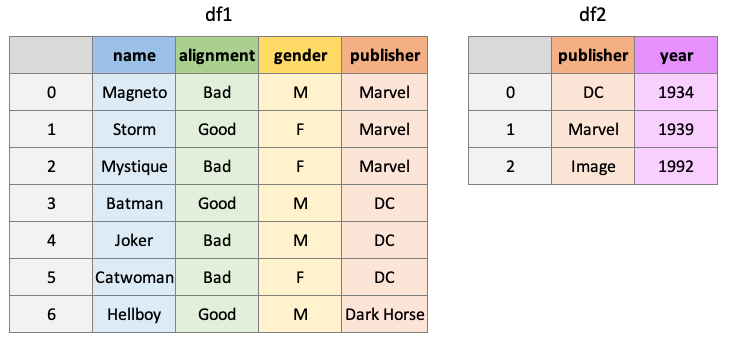

An “inner” join will return all rows of df1 where matching values for “publisher” are found in df2:

In [29]:
pd.merge(df1, df2, how="inner", on="publisher")

,name,alignment,gender,publisher,year_founded
0,Magneto,bad,male,Marvel,1939
1,Storm,good,female,Marvel,1939
2,Mystique,bad,female,Marvel,1939
3,Batman,good,male,DC,1934
4,Joker,bad,male,DC,1934
5,Catwoman,bad,female,DC,1934


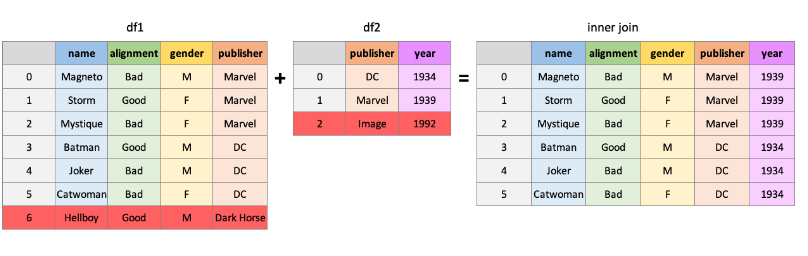

An “outer” join will return all rows of df1 and df2, placing NaNs where information is unavailable:

In [28]:
pd.merge(df1, df2, how="outer", on="publisher")

,name,alignment,gender,publisher,year_founded
0,Magneto,bad,male,Marvel,1939.0
1,Storm,good,female,Marvel,1939.0
2,Mystique,bad,female,Marvel,1939.0
3,Batman,good,male,DC,1934.0
4,Joker,bad,male,DC,1934.0
5,Catwoman,bad,female,DC,1934.0
6,Hellboy,good,male,Dark Horse Comics,NaN
7,NaN,NaN,NaN,Image,1992.0


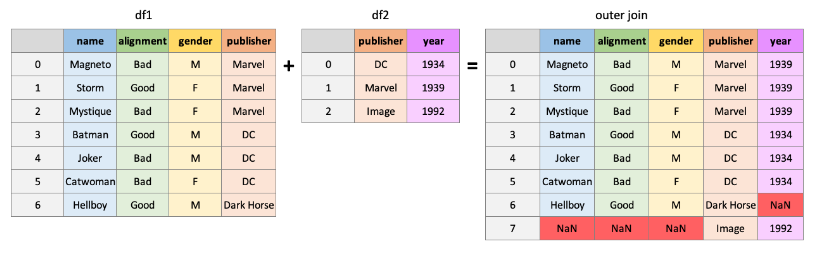

`left` Return all rows from df1 and all columns of df1 and df2, populated where matches occur:

In [30]:
pd.merge(df1, df2, how="left", on="publisher")

,name,alignment,gender,publisher,year_founded
0,Magneto,bad,male,Marvel,1939.0
1,Storm,good,female,Marvel,1939.0
2,Mystique,bad,female,Marvel,1939.0
3,Batman,good,male,DC,1934.0
4,Joker,bad,male,DC,1934.0
5,Catwoman,bad,female,DC,1934.0
6,Hellboy,good,male,Dark Horse Comics,NaN


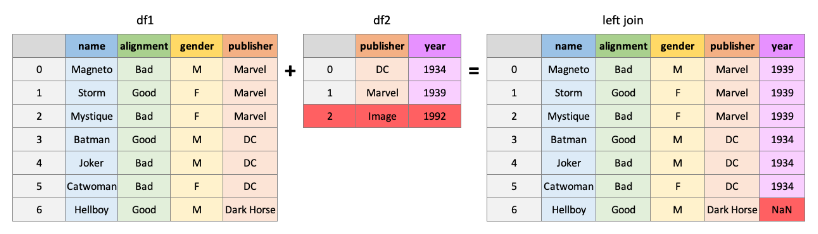

In [31]:
pd.merge(df1, df2, how="right", on="publisher")

,name,alignment,gender,publisher,year_founded
0,Batman,good,male,DC,1934
1,Joker,bad,male,DC,1934
2,Catwoman,bad,female,DC,1934
3,Magneto,bad,male,Marvel,1939
4,Storm,good,female,Marvel,1939
5,Mystique,bad,female,Marvel,1939
6,NaN,NaN,NaN,Image,1992


There are many ways to specify the key to join dataframes on, you can join on index values, different, column names, etc. Another helpful argument is the `indicator` argument which will add a column to the result **telling you where matches were found in the dataframes**:

In [32]:
pd.merge(df1, df2, how="outer", on="publisher", indicator=True)

,name,alignment,gender,publisher,year_founded,_merge
0,Magneto,bad,male,Marvel,1939.0,both
1,Storm,good,female,Marvel,1939.0,both
2,Mystique,bad,female,Marvel,1939.0,both
3,Batman,good,male,DC,1934.0,both
4,Joker,bad,male,DC,1934.0,both
5,Catwoman,bad,female,DC,1934.0,both
6,Hellboy,good,male,Dark Horse Comics,NaN,left_only
7,NaN,NaN,NaN,Image,1992.0,right_only


### Grouping

Often we are interested in examining specific groups in our data. df.groupby() allows us to group our data based on a variable(s).

In [33]:
df = pd.read_csv('cycling_data.csv')
df

,Date,Name,Type,Time,Distance,Comments
0,"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
1,"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
2,"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
3,"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
4,"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
5,"16 Sep 2019, 13:57:48",Morning Ride,Ride,2272,12.45,Rested after the weekend!
6,"17 Sep 2019, 00:15:47",Afternoon Ride,Ride,1973,12.45,Legs feeling strong!
7,"17 Sep 2019, 13:43:34",Morning Ride,Ride,2285,12.60,Raining
8,"18 Sep 2019, 13:49:53",Morning Ride,Ride,2903,14.57,Raining today
9,"18 Sep 2019, 00:15:52",Afternoon Ride,Ride,2101,12.48,Pumped up tires


In [35]:
df.describe()

,Time,Distance
count,33.000000,31.000000
mean,3512.787879,12.667419
std,8003.309233,0.428618
min,1712.000000,11.790000
25%,1863.000000,12.480000
50%,2118.000000,12.620000
75%,2285.000000,12.750000
max,48062.000000,14.570000


Let’s group this dataframe on the column Name:

In [36]:
dfg = df.groupby(by='Name')
dfg

What is a DataFrameGroupBy object? It contains information about the groups of the dataframe:

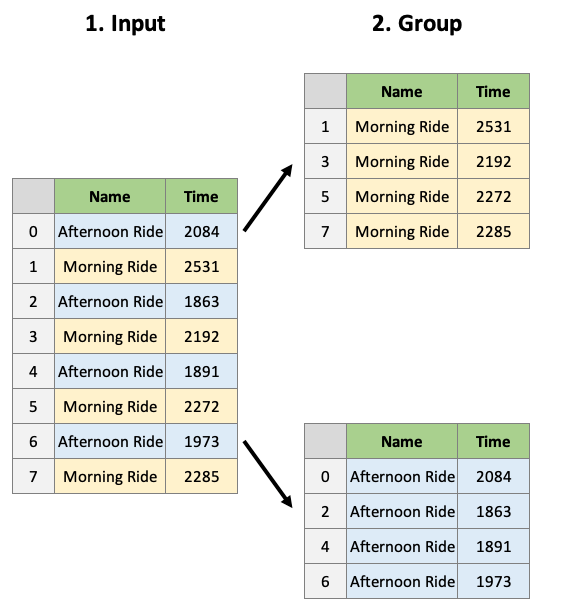

The groupby object is really just a dictionary of index-mappings, which we could look at if we wanted to:



In [37]:
dfg.groups

{'Afternoon Ride': [0, 2, 4, 6, 9, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32], 'Morning Ride': [1, 3, 5, 7, 8, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]}

We can also access a group using the .get_group() method:

In [39]:
dfg.get_group('Morning Ride')

,Date,Name,Type,Time,Distance,Comments
1,"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
3,"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
5,"16 Sep 2019, 13:57:48",Morning Ride,Ride,2272,12.45,Rested after the weekend!
7,"17 Sep 2019, 13:43:34",Morning Ride,Ride,2285,12.60,Raining
8,"18 Sep 2019, 13:49:53",Morning Ride,Ride,2903,14.57,Raining today
11,"19 Sep 2019, 13:52:09",Morning Ride,Ride,2090,12.59,Getting colder which is nice
13,"23 Sep 2019, 13:50:41",Morning Ride,Ride,2462,12.68,Rested after the weekend!
15,"24 Sep 2019, 13:41:24",Morning Ride,Ride,2321,12.68,Bike feeling much smoother
17,"25 Sep 2019, 13:35:41",Morning Ride,Ride,2124,12.65,Stopped for photo of sunrise
19,"26 Sep 2019, 13:42:43",Morning Ride,Ride,2350,12.91,Detour around trucks at Jericho


The usual thing to do however, is to apply **aggregate** functions to the groupby object:

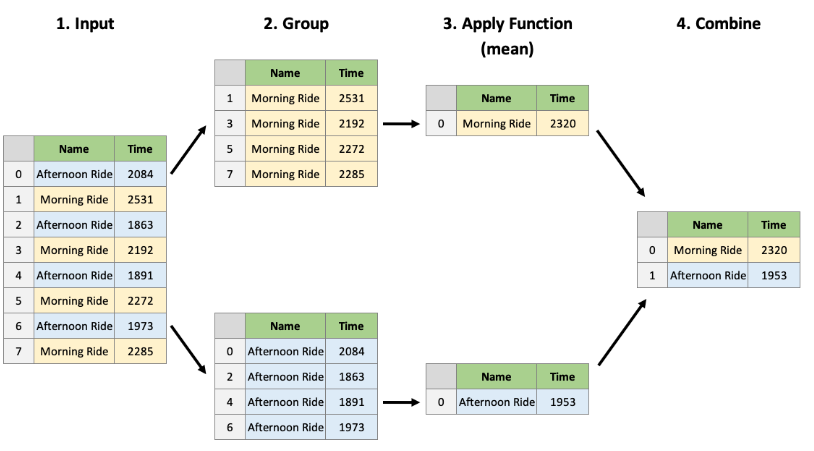

In [41]:
dfg.sum()

C:\Users\Amir Mahdi\AppData\Local\Temp\ipykernel_11592\756938874.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfg.sum()


,Time,Distance
Name,,
Afternoon Ride,79124,186.93
Morning Ride,36798,205.76


We can apply multiple functions using .aggregate():

In [42]:
dfg.aggregate(['mean', 'sum', 'count'])

C:\Users\Amir Mahdi\AppData\Local\Temp\ipykernel_11592\914058847.py:1: FutureWarning: ['Date', 'Type', 'Comments'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  dfg.aggregate(['mean', 'sum', 'count'])


Time              Distance              
                       mean    sum count     mean     sum count
Name                                                           
Afternoon Ride  4654.352941  79124    17   12.462  186.93    15
Morning Ride    2299.875000  36798    16   12.860  205.76    16

And even apply different functions to different columns:

In [43]:
def num_range(x):
    return x.max() - x.min()

dfg.aggregate({"Time": ['max', 'min', 'mean', num_range], 
               "Distance": ['sum']})

Time                              Distance
                  max   min         mean num_range      sum
Name                                                       
Afternoon Ride  48062  1712  4654.352941     46350   186.93
Morning Ride     2903  2090  2299.875000       813   205.76

By the way, you can use aggregate for non-grouped dataframes too. This is pretty much what **df.describe** does under-the-hood:

In [44]:
df.agg(['mean', 'min', 'count', num_range])


C:\Users\Amir Mahdi\AppData\Local\Temp\ipykernel_11592\1172237345.py:1: FutureWarning: ['Date', 'Name', 'Type', 'Comments'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.agg(['mean', 'min', 'count', num_range])


,Date,Name,Type,Time,Distance,Comments
mean,NaN,NaN,NaN,3512.787879,12.667419,NaN
min,"1 Oct 2019, 00:15:07",Afternoon Ride,Ride,1712.000000,11.790000,A little tired today but good weather
count,33,33,33,33.000000,31.000000,33
num_range,NaN,NaN,NaN,46350.000000,2.780000,NaN


## Visualizing DataFrames

Pandas provides a .plot() method on Series and DataFrames which I wanted to show briefly here.

### Simple Plots

In [48]:
df = pd.read_csv('cycling_data.csv', index_col=0, parse_dates=True).dropna()
df

,Name,Type,Time,Distance,Comments
Date,,,,,
2019-09-10 00:13:04,Afternoon Ride,Ride,2084,12.62,Rain
2019-09-10 13:52:18,Morning Ride,Ride,2531,13.03,rain
2019-09-11 00:23:50,Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
2019-09-11 14:06:19,Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
2019-09-12 00:28:05,Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
2019-09-16 13:57:48,Morning Ride,Ride,2272,12.45,Rested after the weekend!
2019-09-17 00:15:47,Afternoon Ride,Ride,1973,12.45,Legs feeling strong!
2019-09-17 13:43:34,Morning Ride,Ride,2285,12.60,Raining
2019-09-18 13:49:53,Morning Ride,Ride,2903,14.57,Raining today


In [49]:
df.head()

,Name,Type,Time,Distance,Comments
Date,,,,,
2019-09-10 00:13:04,Afternoon Ride,Ride,2084,12.62,Rain
2019-09-10 13:52:18,Morning Ride,Ride,2531,13.03,rain
2019-09-11 00:23:50,Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
2019-09-11 14:06:19,Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
2019-09-12 00:28:05,Afternoon Ride,Ride,1891,12.48,Tired by the end of the week


Let’s go ahead and make a plot of the distances I’ve ridden:



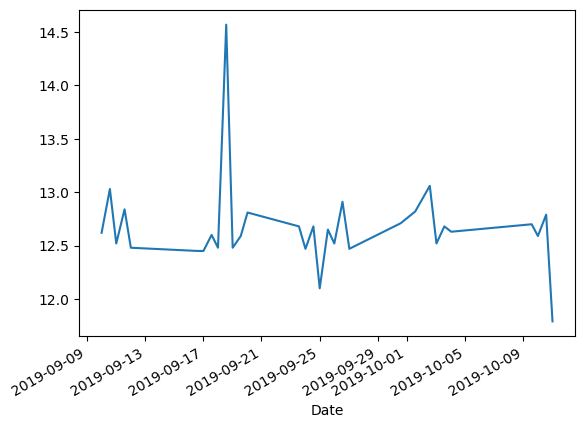

In [50]:
df['Distance'].plot.line();

Cumulative distance might be more informative:



In [52]:
df['Distance'].cumsum()

Date
2019-09-10 00:13:04     12.62
2019-09-10 13:52:18     25.65
2019-09-11 00:23:50     38.17
2019-09-11 14:06:19     51.01
2019-09-12 00:28:05     63.49
2019-09-16 13:57:48     75.94
2019-09-17 00:15:47     88.39
2019-09-17 13:43:34    100.99
2019-09-18 13:49:53    115.56
2019-09-18 00:15:52    128.04
2019-09-19 00:30:01    140.52
2019-09-19 13:52:09    153.11
2019-09-20 01:02:05    165.92
2019-09-23 13:50:41    178.60
2019-09-24 00:35:42    191.07
2019-09-24 13:41:24    203.75
2019-09-25 00:07:21    215.85
2019-09-25 13:35:41    228.50
2019-09-26 00:13:33    241.02
2019-09-26 13:42:43    253.93
2019-09-27 01:00:18    266.40
2019-09-30 13:53:52    279.11
2019-10-01 13:45:55    291.93
2019-10-02 13:46:06    304.99
2019-10-03 00:45:22    317.51
2019-10-03 13:47:36    330.19
2019-10-04 01:08:08    342.82
2019-10-09 13:55:40    355.52
2019-10-10 00:10:31    368.11
2019-10-10 13:47:14    380.90
2019-10-11 00:16:57    392.69
Name: Distance, dtype: float64

<Axes: xlabel='Date'>

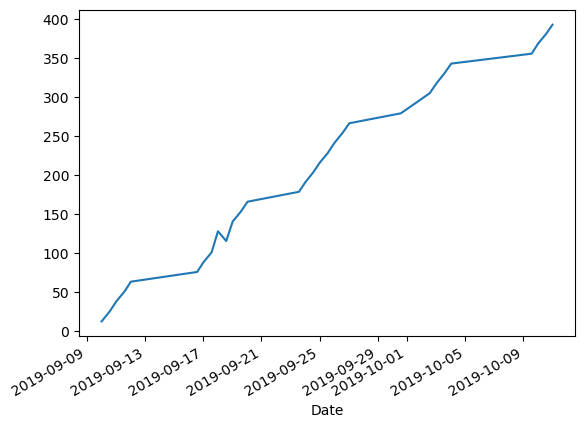

In [53]:
df['Distance'].cumsum().plot.line()

There are many configuration options for these plots which build of the matplotlib library:



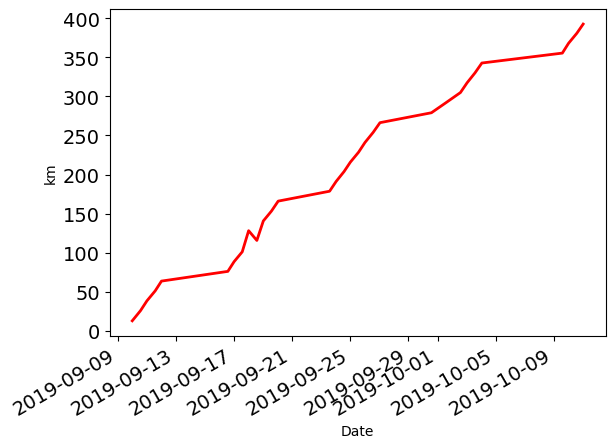

In [54]:
df['Distance'].cumsum().plot.line(fontsize=14, linewidth = 2, color = 'r', ylabel="km");

I actually usually use built-in themes for my plots which do a lot of the colour and text formatting for you:



In [55]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16,
                     'axes.labelweight': 'bold',
                     'figure.figsize': (8,6)})

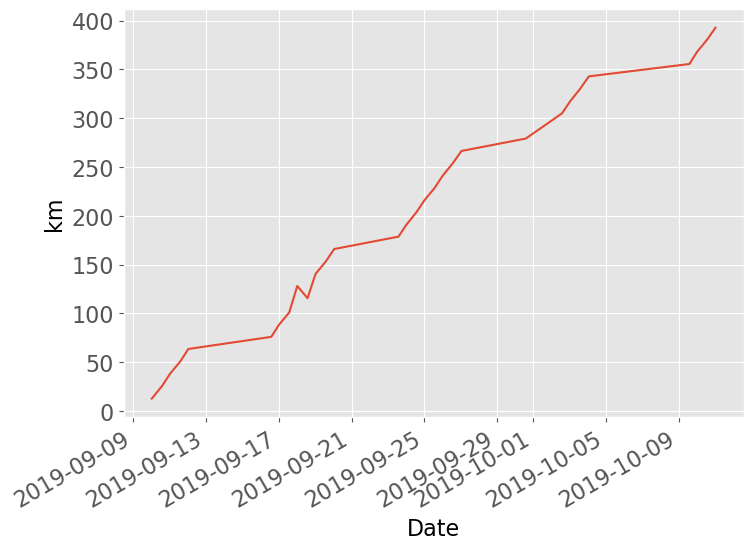

In [56]:
df['Distance'].dropna().cumsum().plot.line(ylabel="km");

Some people have also made custom themes, like this fun cyberpunk theme:



In [ ]:
!pip install mplcyberpunk

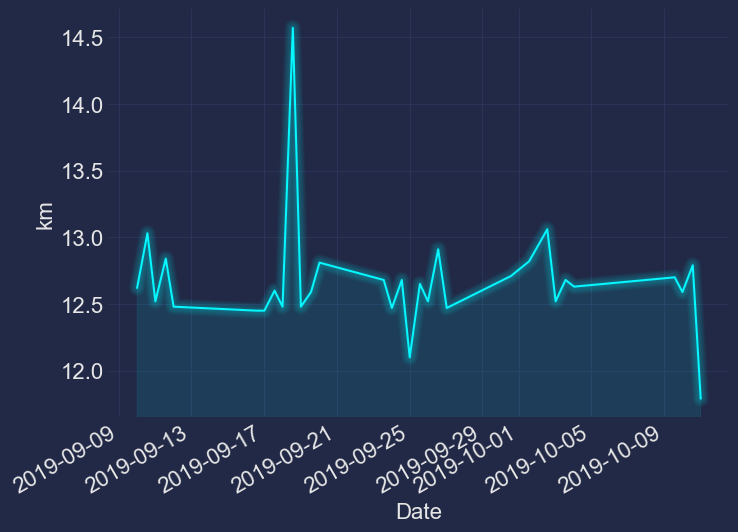

In [57]:
import mplcyberpunk
plt.style.use("cyberpunk")

df['Distance'].plot.line(ylabel="km")
mplcyberpunk.add_glow_effects()

There are many other kinds of plots you can make too:

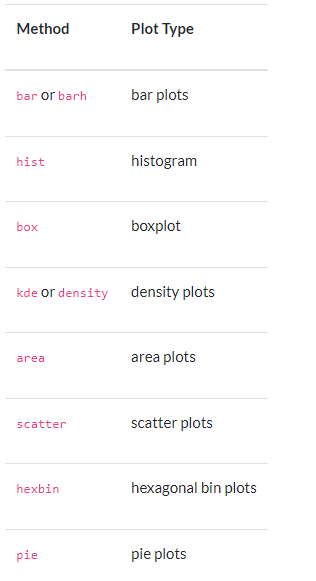

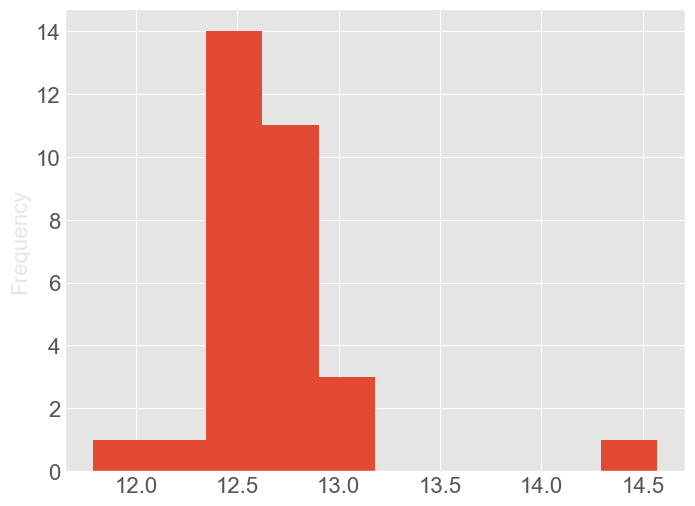

In [58]:
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16,
                     'axes.labelweight': 'bold',
                     'figure.figsize': (8,6)})
df['Distance'].plot.hist();

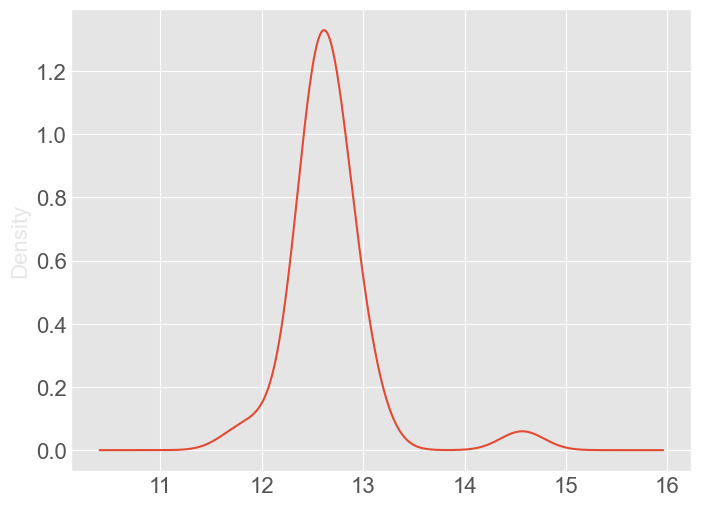

In [59]:
df['Distance'].plot.density();

## Pandas Profiling

Pandas profiling is a nifty tool for generating summary reports and doing exploratory data analysis on dataframes. Pandas profiling is not part of base Pandas but you can install with:

In [ ]:
!pip install pandas-profiling

In [60]:
import pandas_profiling
df = pd.read_csv('cycling_data.csv')
df.profile_report(progress_bar=False)

C:\Users\Amir Mahdi\AppData\Local\Temp\ipykernel_11592\1666968257.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling
